In [ ]:
#Importar pacotes para análise de dados (pandas, numpy, itertools, matplotlib.pyplot):
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Criar dicionário com nomes dos colaboradores responsáveis pela separação em Flow Rack
data = {
    "colab": ["João", "Arthur", "Thiago", "Ana","Luana","Eliane","Catarina","Allonso","Jardel","Lígia","Ruan","Carol"],
}

# Criar um DataFrame a partir da lista de colaboradores:
df = pd.DataFrame(data)
df = df.sort_values(by=['colab'], ascending=True)

# Gerar todas as combinações (onde a ordem dos elementos no grupo não é relavante) possíveis de separadores em linha do Flow Rack:
combinations = []
for i in range(6):
    combinations = combinations + list(itertools.combinations(df['colab'],i+1))

df_comb = pd.DataFrame(combinations, columns=['sep1','sep2','sep3','sep4','sep5','sep6'])
df_comb['Equipe'] = ''

# Identificar cada Equipe com numeração:
df_comb.iloc[:, 6:] = np.arange(1, len(df_comb) + 1)

#tratando valores nulos:
df_comb.fillna('', inplace=True)
df_temp = pd.DataFrame(df_comb[['sep1','sep2','sep3','sep4','sep5','sep6']].apply(sorted, axis=1), columns=['sep'])
df_temp = df_temp['sep'].apply(pd.Series)
df_temp['Equipe'] = df_comb['Equipe']
df_temp.columns = ['sep1','sep2','sep3','sep4','sep5','sep6','Equipe']
df_comb = df_temp

<ipython-input-23-965399e3b561>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_comb.iloc[:, 6:] = np.arange(1, len(df_comb) + 1)


In [ ]:
#Leitura do arquivo de coleta de dados da produtividade (dataset para dataframe)
df_base = pd.read_excel('/content/base_prod.xlsx')
df_base = df_base.replace(np.nan, '')

#Ordenar nomes em linha alfabeticamente (a ordem dos separadores no Flow Rack não é relevante nessa análise)
df_temp = pd.DataFrame(df_base[['sep1','sep2','sep3','sep4','sep5','sep6']].apply(sorted, axis=1), columns=['sep'])
df_temp = df_temp['sep'].apply(pd.Series)
df_temp['tempo'] = df_base['temp']
df_temp.columns = ['sep1','sep2','sep3','sep4','sep5','sep6','tempo']

In [ ]:
#Join para construção de um DataFrame analítico:
df_analitico = df_comb.merge(df_temp, how='inner')

In [ ]:
# Gerar df analítico
df_analitico = df_analitico.groupby('Equipe').mean()
df_analitico = pd.DataFrame(df_analitico)
# Adicionar uma coluna de ID
df_analitico = df_analitico.reset_index()
#Ordenar por tempo
df_analitico = df_analitico.sort_values(by='tempo')
df_analitico['Equipe_norm'] = range(1, len(df_analitico['Equipe']) + 1)
df_analitico.reindex(columns=['Equipe','Equipe_norm','tempo'])

<ipython-input-26-a59d4529eafa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_analitico = df_analitico.groupby('Equipe').mean()


,Equipe,Equipe_norm,tempo
7,1615,1,1.666667
9,1619,2,3.000000
11,1628,3,3.333333
12,1631,4,3.333333
10,1625,5,3.666667
1,2,6,5.000000
6,35,7,6.000000
8,1616,8,6.333333
0,1,9,7.000000
5,26,10,7.000000


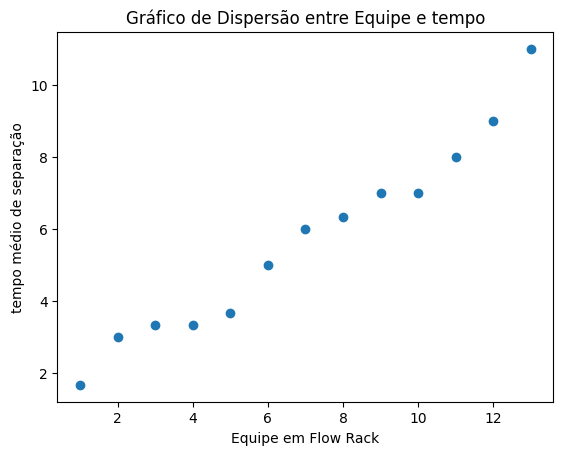

In [ ]:
# Extrair os dados das colunas
x = df_analitico['Equipe_norm']
y = df_analitico['tempo']

# Intervalo desejado para o eixo x
x_min = 1
x_max = 15

# Filtrar os dados dentro do intervalo desejado
indices = (x >= x_min) & (x <= x_max)
x_filtrado = x[indices]
y_filtrado = y[indices]

# Criar um gráfico de dispersão usando Matplotlib
plt.scatter(x_filtrado, y_filtrado)
plt.xlabel('Equipe em Flow Rack')
plt.ylabel('tempo médio de separação')
plt.title('Gráfico de Dispersão entre Equipe e tempo')
plt.show()